# Book Recommendation System

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity


In [95]:
books = pd.read_csv('Books.csv', encoding='latin-1')
users = pd.read_csv('Users.csv', encoding='latin-1')
ratings = pd.read_csv('Ratings.csv', encoding='latin-1')

print("Books Shape:", books.shape)
print("Users Shape:", users.shape)
print("Ratings Shape:", ratings.shape)

Books Shape: (271360, 8)
Users Shape: (278858, 3)
Ratings Shape: (1149780, 3)


In [96]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [97]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [98]:
users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [99]:
print("nan values in Books:\n", books.isnull().sum())
print("nan values in Users:\n", users.isnull().sum())
print("nan values in Ratings:\n", ratings.isnull().sum())

nan values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
nan values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64
nan values in Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [100]:
books.rename(columns={'Book-Title': 'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher'}, inplace=True)
users.rename(columns={'User-ID': 'user_id', 'Location': 'location', 'Age': 'age'}, inplace=True)
ratings.rename(columns={'User-ID': 'user_id', 'Book-Rating': 'rating'}, inplace=True)

In [101]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head(2)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [102]:
ratings_with_name = ratings.merge(books, on='ISBN')
print(ratings_with_name.shape)
ratings_with_name.head()

(1031136, 7)


,user_id,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


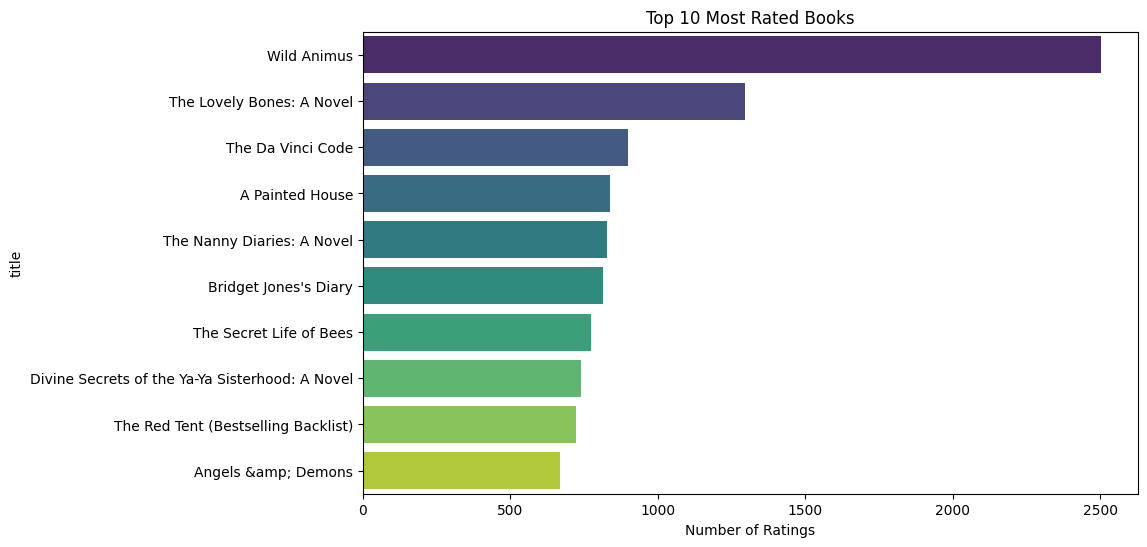

In [103]:
# Top 10 Rated Books
top_books = ratings_with_name.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_books.values, y=top_books.index, palette='viridis')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.show()

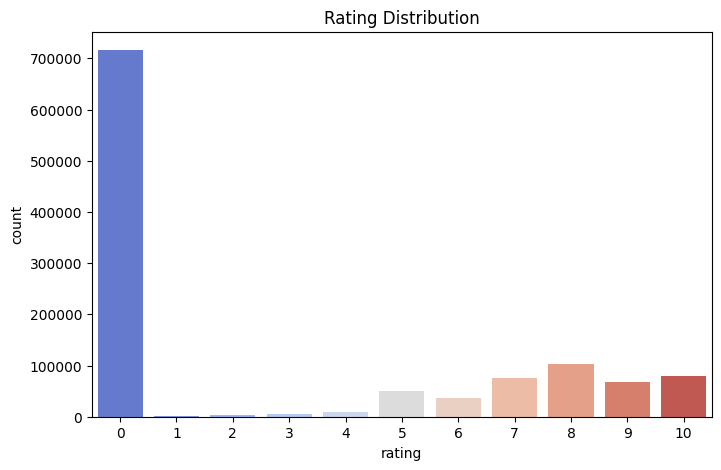

In [104]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings, palette='coolwarm')
plt.title('Rating Distribution')
plt.show()

In [105]:
x=ratings_with_name.groupby('user_id').count()['rating']>200
know_users = x[x].index
filtered_rating = ratings_with_name[ratings_with_name['user_id'].isin(know_users)]

y=filtered_rating.groupby('title')['rating'].count() >= 50
famous_books = y[y].index
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_books)]

print(final_ratings.shape)
print(final_ratings.head(6))

(58586, 7)
      user_id        ISBN  rating  \
1150   277427  002542730X      10   
1163   277427  0060930535       0   
1165   277427  0060934417       0   
1168   277427  0061009059       9   
1174   277427  006440188X       0   
1177   277427  0140067477       0   

                                                  title  \
1150  Politically Correct Bedtime Stories: Modern Ta...   
1163                      The Poisonwood Bible: A Novel   
1165                                 Bel Canto: A Novel   
1168  One for the Money (Stephanie Plum Novels (Pape...   
1174                                  The Secret Garden   
1177                                    The Tao of Pooh   

                       author  year                  publisher  
1150        James Finn Garner  1994  John Wiley &amp; Sons Inc  
1163       Barbara Kingsolver  1999                  Perennial  
1165             Ann Patchett  2002                  Perennial  
1168          Janet Evanovich  1995                Harp

In [106]:
pt = final_ratings.pivot_table(index='title', columns='user_id', values='rating')
pt.fillna(0, inplace=True)
print(pt.shape)
pt.head()

(706, 810)


user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model 1: Collaborative Filtering (Cosine Similarity)


In [107]:
similarity_scores = cosine_similarity(pt)
print(similarity_scores.shape)

(706, 706)


In [108]:
def recommend(book_name, verbose=True):
    if book_name not in pt.index:
        if verbose: print("Book not found in the dataset.")
        return []
    
    # tjib authors
    try:
        book_author = books[books['title'] == book_name]['author'].values[0]
    except IndexError:
        book_author = "Unknown"

    if verbose: print(f"--- Recommendations for '{book_name}' by {book_author} ---\n")
    
    results = []
    
    same_author_books = books[books['author'] == book_author]['title'].unique()
    same_author_books_in_pt = [b for b in same_author_books if b in pt.index and b != book_name]
    
    book_ratings = []
    for book in same_author_books_in_pt:
        filtered = final_ratings[final_ratings['title'] == book]
        if not filtered.empty:
            avg_rating = filtered['rating'].mean()
            book_ratings.append((book, avg_rating))
    
    same_author_books_sorted = sorted(book_ratings, key=lambda x: x[1], reverse=True)
    
    if same_author_books_sorted:
        if verbose: print(f"Top Books by {book_author}:")
        for book, rating in same_author_books_sorted[:5]:
             if verbose: print(f"- {book} ({book_author})")
             results.append((book, book_author))
        if verbose: print("\n" + "-"*30 + "\n")
         
    # 3. Collaborative Filtering
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:10]
    
    if verbose: print(f"You might also like (Similar Books):")
    count = 0
    recommended_set = set([b[0] for b in same_author_books_sorted[:5]])
    
    for i in similar_items:
        similar_book_name = pt.index[i[0]]
        if similar_book_name not in recommended_set:
            try:
                sim_author = books[books['title'] == similar_book_name]['author'].values[0]
            except IndexError:
                sim_author = "Unknown"
            if verbose: print(f"- {similar_book_name} ({sim_author})")
            results.append((similar_book_name, sim_author))
            count += 1
            recommended_set.add(similar_book_name)
        if count >= 5:
            break
    
    return results

In [109]:
recommend('1984');

--- Recommendations for '1984' by George Orwell ---

Top Books by George Orwell:
- Animal Farm (George Orwell)

------------------------------

You might also like (Similar Books):
- The Handmaid's Tale (Margaret Atwood)
- Brave New World (Aldous Huxley)
- The Vampire Lestat (Vampire Chronicles, Book II) (ANNE RICE)
- The Hours : A Novel (Michael Cunningham)
- Fahrenheit 451 (Ray Bradbury)


## Model 2: K-Means Clustering

In [110]:
sil_scores = []
for i in range(2, 16):  
    kmeans_temp = KMeans(n_clusters=i, random_state=42)
    labels = kmeans_temp.fit_predict(pt)
    sil_score = silhouette_score(pt, labels)
    sil_scores.append(sil_score)


optimal_k = range(2,16)[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [111]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pt)

clusters = kmeans.predict(pt)

In [112]:
def recommend_kmeans(book_name, verbose=True):
    if book_name not in pt.index:
        if verbose: print("Book not found.")
        return []
    
    try:
        book_author = books[books['title'] == book_name]['author'].values[0]
    except IndexError:
        book_author = "Unknown"
        
    if verbose: print(f"--- K-Means Recommendations for '{book_name}' by {book_author} ---\n")
    
    results = []
    
    same_author_books = books[books['author'] == book_author]['title'].unique()
    same_author_books_in_pt = [b for b in same_author_books if b in pt.index and b != book_name]
    
    book_ratings = []
    for book in same_author_books_in_pt:
        filtered = final_ratings[final_ratings['title'] == book]
        if not filtered.empty:
            avg_rating = filtered['rating'].mean()
            book_ratings.append((book, avg_rating))
    
    same_author_books_sorted = sorted(book_ratings, key=lambda x: x[1], reverse=True)
    
    if same_author_books_sorted:
        if verbose: print(f"Top Books by {book_author}:")
        for book, rating in same_author_books_sorted[:5]:
             if verbose: print(f"- {book} ({book_author})")
             results.append((book, book_author))
        if verbose: print("\n" + "-"*30 + "\n")

    book_idx = np.where(pt.index == book_name)[0][0]
    book_cluster = clusters[book_idx]
    
    cluster_indices = np.where(clusters == book_cluster)[0]
    
    if verbose: print(f"Books in the same cluster (Cluster {book_cluster}):")
    count = 0
    recommended_set = set([b[0] for b in same_author_books_sorted[:5]])
    recommended_set.add(book_name)
    
    for idx in cluster_indices:
        sim_book = pt.index[idx]
        
        if sim_book not in recommended_set:
            try:
                sim_author = books[books['title'] == sim_book]['author'].values[0]
            except IndexError:
                sim_author = "Unknown"
            
            # similar authors me yothhrouch
            if sim_author != book_author:
                 if verbose: print(f"- {sim_book} ({sim_author})")
                 results.append((sim_book, sim_author))
                 count += 1
                 recommended_set.add(sim_book)
        
        if count >= 5:
            break
            
    return results

In [113]:
recommend_kmeans('1984')

--- K-Means Recommendations for '1984' by George Orwell ---

Top Books by George Orwell:
- Animal Farm (George Orwell)

------------------------------

Books in the same cluster (Cluster 1):
- 1st to Die: A Novel (James Patterson)
- 2nd Chance (James Patterson)
- 4 Blondes (Candace Bushnell)
- A Bend in the Road (Nicholas Sparks)
- A Case of Need (Michael Crichton)


[('Animal Farm', 'George Orwell'),
 ('1st to Die: A Novel', 'James Patterson'),
 ('2nd Chance', 'James Patterson'),
 ('4 Blondes', 'Candace Bushnell'),
 ('A Bend in the Road', 'Nicholas Sparks'),
 ('A Case of Need', 'Michael Crichton')]

## 7. Model Evaluation
Comparing Collaborative Filtering vs K-Means using Diversity and Rating Quality.

In [114]:
def evaluate_models(test_books):
    metrics = []
    
    for book in test_books:
        if book not in pt.index: 
            continue
            
        print(f"\nEvaluating: {book}...")
        
        print("\n[CF Output]")
        recs_cf = recommend(book)
        print("\n[K-Means Output]")
        recs_km = recommend_kmeans(book)
        
        def calc_metrics(recs, model_name):
            if not recs: return 0, 0
            authors = set([r[1] for r in recs])
            diversity = len(authors)
            
            total_rating = 0
            count = 0
            for title, auth in recs:
                 filtered = final_ratings[final_ratings['title'] == title]
                 if not filtered.empty:
                     total_rating += filtered['rating'].mean()
                     count += 1
            avg_quality = total_rating / count if count > 0 else 0
            
            return diversity, avg_quality
            
        div_cf, qual_cf = calc_metrics(recs_cf, "CF")
        div_km, qual_km = calc_metrics(recs_km, "KMeans")
        
        metrics.append({
            'Book': book,
            'CF_Diversity (Authors)': div_cf,
            'CF_Quality': round(qual_cf, 2),
            'KM_Diversity (Authors)': div_km,
            'KM_Quality': round(qual_km, 2)
        })
    
    return pd.DataFrame(metrics)

test_books_list = ['1984', 'The Notebook', 'Harry Potter and the Sorcerer\'s Stone (Book 1)']
results_df = evaluate_models(test_books_list)
results_df


Evaluating: 1984...

[CF Output]
--- Recommendations for '1984' by George Orwell ---

Top Books by George Orwell:
- Animal Farm (George Orwell)

------------------------------

You might also like (Similar Books):
- The Handmaid's Tale (Margaret Atwood)
- Brave New World (Aldous Huxley)
- The Vampire Lestat (Vampire Chronicles, Book II) (ANNE RICE)
- The Hours : A Novel (Michael Cunningham)
- Fahrenheit 451 (Ray Bradbury)

[K-Means Output]
--- K-Means Recommendations for '1984' by George Orwell ---

Top Books by George Orwell:
- Animal Farm (George Orwell)

------------------------------

Books in the same cluster (Cluster 1):
- 1st to Die: A Novel (James Patterson)
- 2nd Chance (James Patterson)
- 4 Blondes (Candace Bushnell)
- A Bend in the Road (Nicholas Sparks)
- A Case of Need (Michael Crichton)

Evaluating: The Notebook...

[CF Output]
--- Recommendations for 'The Notebook' by Nicholas Sparks ---

Top Books by Nicholas Sparks:
- The Guardian (Nicholas Sparks)
- A Walk to Remembe

,Book,CF_Diversity (Authors),CF_Quality,KM_Diversity (Authors),KM_Quality
0,1984,6,2.63,5,1.95
1,The Notebook,6,2.02,5,1.92
2,Harry Potter and the Sorcerer's Stone (Book 1),6,3.21,5,3.11


## 8. Value Add: Hybrid Recommendations
combining results from both models for robust suggestions.

In [115]:
def recommend_hybrid(book_name):
   
    print(f"--- Hybrid Recommendations for '{book_name}' ---")
    
    recs_cf = recommend(book_name, verbose=False)
    recs_km = recommend_kmeans(book_name, verbose=False)
    
    cf_titles = [r[0] for r in recs_cf]
    km_titles = [r[0] for r in recs_km]
    
    intersection = set(cf_titles).intersection(set(km_titles))
    
    final_recs = []
    
    if intersection:
        print("\n[Both Models Agree]")
        for title in intersection:
            auth = [r[1] for r in recs_cf if r[0] == title][0]
            print(f"- {title} ({auth})")
            final_recs.append(title)
            
    print("\n[Other Recommendations]")
    for r in recs_cf:
        if r[0] not in final_recs:
            print(f"- {r[0]} ({r[1]})")
            final_recs.append(r[0])
            
    for r in recs_km:
        if r[0] not in final_recs:
             print(f"- {r[0]} ({r[1]})")
             final_recs.append(r[0])

recommend_hybrid('1984')

--- Hybrid Recommendations for '1984' ---

[Both Models Agree]
- Animal Farm (George Orwell)

[Other Recommendations]
- The Handmaid's Tale (Margaret Atwood)
- Brave New World (Aldous Huxley)
- The Vampire Lestat (Vampire Chronicles, Book II) (ANNE RICE)
- The Hours : A Novel (Michael Cunningham)
- Fahrenheit 451 (Ray Bradbury)
- 1st to Die: A Novel (James Patterson)
- 2nd Chance (James Patterson)
- 4 Blondes (Candace Bushnell)
- A Bend in the Road (Nicholas Sparks)
- A Case of Need (Michael Crichton)
